<a href="https://colab.research.google.com/github/AnToxa0887/innopolis_2/blob/main/HW_11__%D0%A3%D0%BF%D1%80%D0%B0%D0%B6%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 34.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


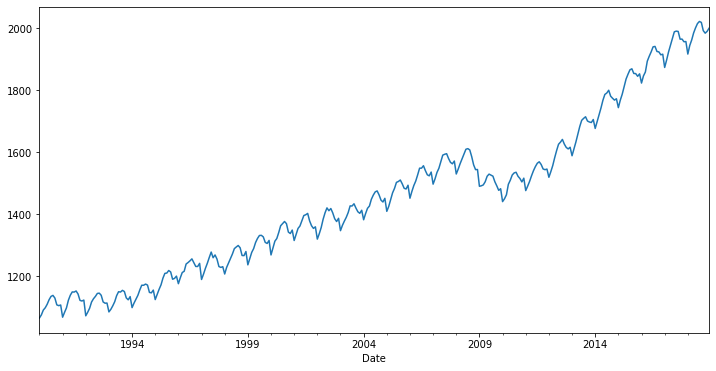

In [8]:
## Постройте график атрибута 'Employees'



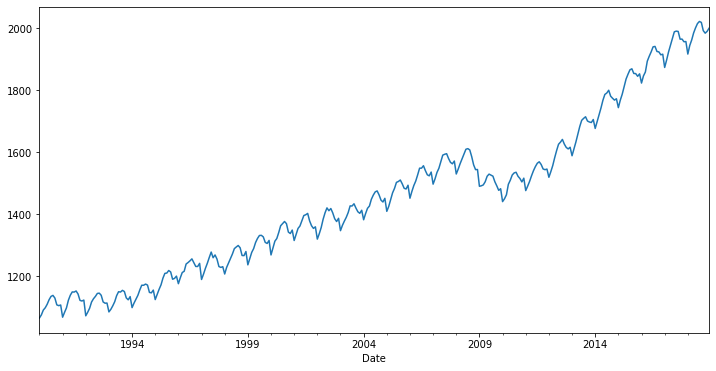

In [11]:
# добавьте заголовок и подписи
ax = df['Employees'].plot(figsize=(12,6)) #добавлем заголовок
ax.autoscale(axis='x', tight=True)

[Text(0, 0.5, 'Thousands of Persons'), Text(0.5, 0, '')]

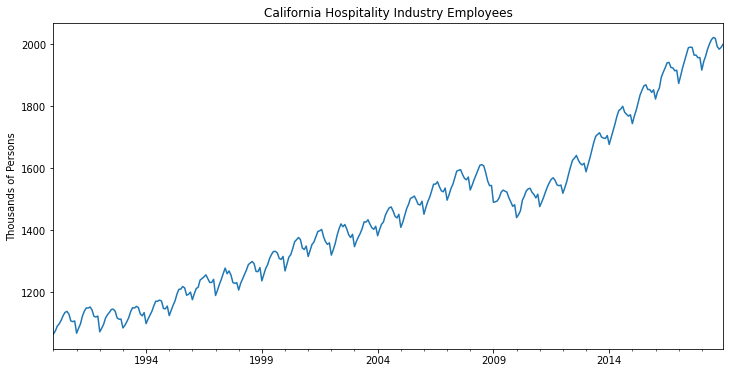

In [14]:
#добавляем название графика и название оси Y
title = 'California Hospitality Industry Employees' #прописываем название графика
ylabel = 'Thousands of Persons' #название оси Y
xlabel = '' #по сравнению с ожидаемым результатом не указываем название оси Х

##уже добавлено
ax = df['Employees'].plot(figsize=(12,6),title=title) #добавлем название графика
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

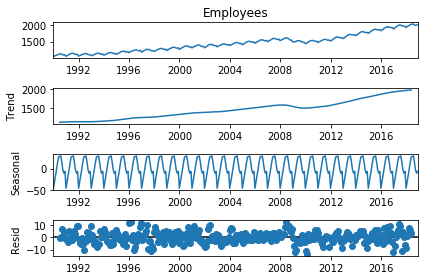

In [ ]:
# отобразите результат


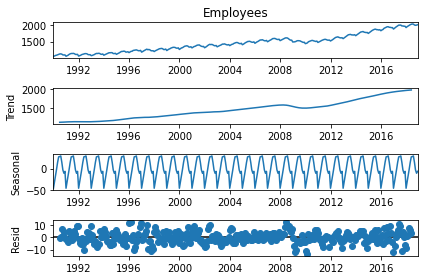

In [15]:
# отобразите результат
r = seasonal_decompose(df['Employees'], model='additive')

r.plot();
# замечаем годовую сезонность

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [ ]:
# Подсказка: используйте auto_arima

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/U

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.307
Date:                              Sun, 07 Mar 2021   AIC                           2210.614
Time:                                      09:24:54   BIC                           2237.559
Sample:                                           0   HQIC                          2221.342
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.083      0.934      -0.010       0.011
ar.L1          0.9223      0.046     20.140      0.000       0.833       1.012
ma.L1         -0.9440      0.070    -13.421      0.000      -1.082      -0.806
ma.L2          0.1318      0.060      2.196      0.028       0.014       0.249
ar.S.L12       0.9977      0.001    717.060      0.000       0.995       1.000
ma.S.L12      -0.7573      0.042    -17.909      0.000      -0.840      -0.674
sigma2        29.1983      1.702     17.152      0.000      25.862      32.535
===================================================================================
Ljung-Box (Q):                       32.11   Jarque-Bera (JB):                66.37
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train['Employees']

In [ ]:
model = [ваш код: вызов одной функции]
results = model.fit()
results.summary()

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 07 Mar 2021   AIC                           2128.116
Time:                                      09:40:02   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.235      0.000       0.839       1.009
ma.L1         -0.9583      0.070    -13.634      0.000      -1.096      -0.821
ma.L2          0.1497      0.061      2.456      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    731.206      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.166      0.000      -0.838      -0.666
sigma2        28.7622      1.684     17.079      0.000      25.462      32.063
===================================================================================
Ljung-Box (Q):                       29.90   Jarque-Bera (JB):                73.33
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [ ]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

### 7. Нарисуйте графики прогнозируемых и известных значений


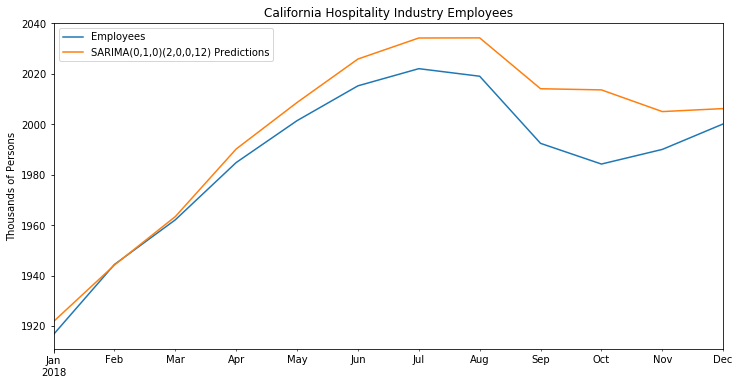

In [ ]:
# ваш код

### 8. Оцените качество модели с помощью MSE и RMSE


In [ ]:
# Подсказка: используйте функции mean_squared_error и rmse 

print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.64833237
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.811829116


In [ ]:
# ваш код

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [ ]:
model = [ваш код]
results = model.fit()
results.summary()

/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/vladimirivanov/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 07 Mar 2021   AIC                           2208.504
Time:                                      09:53:02   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.473      0.000       0.836       1.013
ma.L1         -0.9440      0.069    -13.765      0.000      -1.078      -0.810
ma.L2          0.1286      0.058      2.212      0.027       0.015       0.243
ar.S.L12       0.9972      0.001    702.406      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.340      0.000      -0.834      -0.664
sigma2        29.2968      1.717     17.062      0.000      25.931      32.662
===================================================================================
Ljung-Box (Q):                       31.48   Jarque-Bera (JB):                67.46
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# для прогнозирования используйте с нужными параметрами results.predict() -- см. выше
fcast = [ваш код] 

### 10. Постройте график предсказаний и график исходных данных


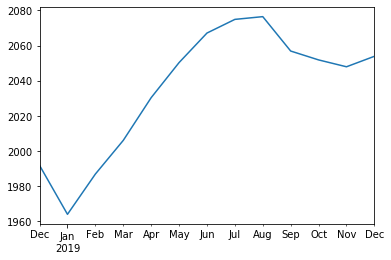

In [ ]:
fcast.plot()

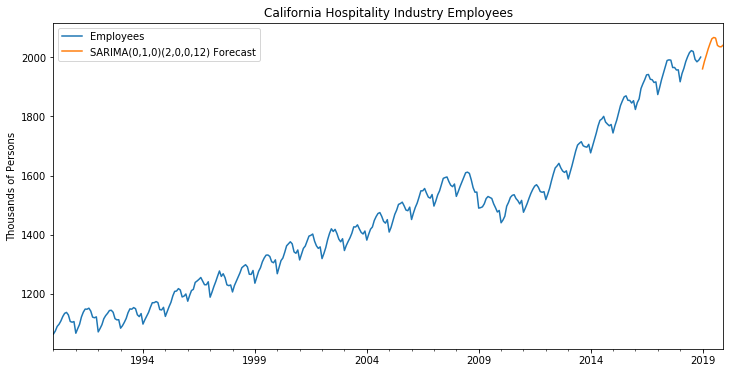

In [ ]:
# отобразите общий график